# 리스크 할당(Risk Budgeting) 모형 포트폴리오 산출 기본

In [0]:
import numpy as np
import pandas as pd
import scipy.optimize as sco
import datetime as dt
from datetime import timedelta
from pylab import *

# 예스트레이더 출력 결과물을 Pandas 형태로 포맷 변환

In [0]:
# 예스트레이더 종목검색 결과를 날짜 기준으로 포맷팅
def convert_yes_price_file(gubun):
    # 우리나라 시간 = 그리니치 표준시 + 9시
    file_dt = (dt.datetime.now() + dt.timedelta(hours=9)).strftime('%Y%m%d')

    yes_price_file = pd.DataFrame()
    # 예스트레이더 출력용 지표식과 칼럼수 일치시켜야 함.
    yes_price_file = pd.read_csv('yes_stock_price_' + file_dt + '.csv',encoding= 'euc-kr',
                           names = ['날짜1','종목명','종목코드','날짜','시가','고가','저가','종가','거래량',
                                    '단기이평','중기이평','장기이평','지수단기이평','지수중기이평','지수장기이평',
                                    'MACD','MACD_OSC','ATR','CCI','StoK','StoD','TRIX','이격도'],
                           index_col= 1, header=None, dtype={'종목코드':str})

    종목명 = yes_price_file.index.unique()
    종목코드 = yes_price_file['종목코드'].unique()  # 종목코드 사용할 경우를 위해 별도 저장
    df1 = {'종목명':종목명,
           '종목코드':종목코드}
    df1 = pd.DataFrame(df1)
    df1.to_csv('symbol_cd.csv')

    cls_p_data = pd.DataFrame()
    vol_data = pd.DataFrame()
    if gubun == 1:
        hi_p_data = pd.DataFrame()
        lo_p_data = pd.DataFrame()
        sma_data = pd.DataFrame()
        mma_data = pd.DataFrame()
        lma_data = pd.DataFrame()
        sema_data = pd.DataFrame()
        mema_data = pd.DataFrame()
        lema_data = pd.DataFrame()
        macd_data = pd.DataFrame()
        macdo_data = pd.DataFrame()
        atr_data = pd.DataFrame()
        cci_data = pd.DataFrame()
        stok_data = pd.DataFrame()
        stod_data = pd.DataFrame()
        trix_data = pd.DataFrame()
        dis_data = pd.DataFrame()

    for i in range(len(종목명)):
        cls_p = yes_price_file.loc[종목명[i],['날짜','종가']]
        cls_p.set_index(['날짜'],inplace=True)
        cls_p_data = pd.concat([cls_p_data,cls_p],axis=1) 

        vol = yes_price_file.loc[종목명[i],['날짜','거래량']]
        vol.set_index(['날짜'],inplace=True)
        vol_data = pd.concat([vol_data,vol],axis=1) 

        if gubun == 1:
            hi_p = yes_price_file.loc[종목명[i],['날짜','고가']]
            hi_p.set_index(['날짜'],inplace=True)
            hi_p_data = pd.concat([hi_p_data,hi_p],axis=1) 

            lo_p = yes_price_file.loc[종목명[i],['날짜','저가']]
            lo_p.set_index(['날짜'],inplace=True)
            lo_p_data = pd.concat([lo_p_data,lo_p],axis=1) 

            sma = yes_price_file.loc[종목명[i],['날짜','단기이평']]
            sma.set_index(['날짜'],inplace=True)
            sma_data = pd.concat([sma_data,sma],axis=1) 

            mma = yes_price_file.loc[종목명[i],['날짜','중기이평']]
            mma.set_index(['날짜'],inplace=True)
            mma_data = pd.concat([mma_data,mma],axis=1) 

            lma = yes_price_file.loc[종목명[i],['날짜','장기이평']]
            lma.set_index(['날짜'],inplace=True)
            lma_data = pd.concat([lma_data,lma],axis=1) 

            atr = yes_price_file.loc[종목명[i],['날짜','ATR']]
            atr.set_index(['날짜'],inplace=True)
            atr_data = pd.concat([atr_data,atr],axis=1) 

    cls_p_data.columns = 종목명
    print('\n 종가데이터 \n', cls_p_data.head())
    cls_p_data.to_csv('cls_p_data.csv')

    vol_data.columns = 종목명
    print('\n 거래량 \n', vol_data.head())
    vol_data.to_csv('volume_data.csv')

    if gubun == 1:
        hi_p_data.columns = 종목명
        print('\n 고가데이터 \n', hi_p_data.head())
        hi_p_data.to_csv('hi_p_data.csv')

        lo_p_data.columns = 종목명
        print('\n 저가데이터 \n', lo_p_data.head())
        lo_p_data.to_csv('lo_p_data.csv')

        sma_data.columns = 종목명
        print('\n 단기이평 \n', sma_data.head())
        sma_data.to_csv('sma_data.csv')

        mma_data.columns = 종목명
        print('\n 중기이평 \n', mma_data.head())
        mma_data.to_csv('mma_data.csv')

        lma_data.columns = 종목명
        print('\n 장기이평 \n', lma_data.head())
        lma_data.to_csv('lma_data.csv')

        atr_data.columns = 종목명
        print('\n ATR \n', atr_data.head())
        atr_data.to_csv('atr_data.csv')

In [0]:
gubun = 0 # 지표 파일을 만들려면 1로, 안 만들여면 0
convert_yes_price_file(gubun)  


 종가데이터 
 종목명         나노메딕스     필룩스   카리스국보    동성제약  ...     파미셀   일성건설     비티원     한창
날짜                                         ...                              
20131007.0  644.0  1493.0  1007.0  4010.0  ...  4055.0  596.0  1090.0  505.0
20131008.0  621.0  1460.0   986.0  3925.0  ...  4075.0  603.0  1075.0  493.0
20131010.0  618.0  1489.0   982.0  3860.0  ...  4005.0  600.0  1090.0  490.0
20131011.0  619.0  1503.0   986.0  3770.0  ...  4190.0  605.0  1060.0  495.0
20131014.0  612.0  1522.0   978.0  3795.0  ...  4395.0  606.0  1040.0  495.0

[5 rows x 18 columns]

 거래량 
 종목명            나노메딕스       필룩스   카리스국보  ...     일성건설      비티원        한창
날짜                                      ...                            
20131007.0   45802.0  117201.0  5780.0  ...  21562.0  33100.0  144080.0
20131008.0   86170.0  172264.0  2650.0  ...  14712.0  13170.0   70850.0
20131010.0   36482.0  112361.0  1840.0  ...  22720.0   6580.0   11660.0
20131011.0   22642.0  111135.0  3500.0  ...   9610.0  16430.

# 사용자 함수 선언

In [0]:
def statistics(w,r,c):
    '''포트폴리오 총계치 출력
    인수
    =====
    w : array-like  포트폴리오 내의 비중
    
    반환값
    ======
    portfolio_return     : float 포트폴리오 수익률 기댓값
    portfolio_volatility : float 포트폴리오 변동성 기댓값
    sharpe_ratio         : float 무위험 이자율이 0일 때의 샤프 지수
    '''
    w = np.array(w)
    portfolio_return = np.sum(r * w)
    portfolio_volatility = np.sqrt(np.dot(w.T,np.dot(c, w)))
    sharp_ratio = portfolio_return / portfolio_volatility
    return np.array([portfolio_return, portfolio_volatility, sharp_ratio])

In [0]:
def risk_contribution(w,r,c):
    '''
    E(rp) = w'μ          : 포트폴리오 기대수익률
    σp orσ(w) = √(w'Ωw) : 포트폴리오 표준편차
    where w:= 구성종목 비중vector
          μ:= 자산별 기대수익률 vector
          Ω:= 공분산행렬
    Marginal Contribution to Risk of asset i(한계 리스크 기여도)
    MCRi = ∂σ(w)/∂wi = Δσ(w)/Δwi = 1/σ(w) * Σwi*cov(ri,rj) = Ωw/√(w'Ωw)
    := i번째 자산군 투자비중 변화에 대한 포트폴리오 전체 위험의 변화 정도
    Absolute Contribution to Risk of asset i(절대 리스크 기여도) 자산의 표준편차 값
    ACRi = wi*MCRi
    Percent Contribution to Risk of asset i(상대 리스크 기여도) 전체 중에 얼마인지 퍼센트로 표시한 것
    PCRi = ACRi/σ(w)
    '''
    sigma = statistics(w,r,c)[1]
    mcr = np.dot(c, w) / sigma
    acr = w * mcr
    pcr = acr / sigma
    return mcr, acr, pcr

In [0]:
# 최적포트폴리오의 투자비중과 포트폴리오 위험비중이 동일하게
def risk_budgeting_objective(w,r,c,front):
    sigma = statistics(w,r,c)[1]
    mcr = np.dot(c, w) / sigma
    return np.sum(np.square(front - (w * mcr / sigma)))

In [0]:
def min_func_sharpe(w,r,c):
# 최소화문제에서 샤프지수 최대값을 찾으려면 샤프지수의 음수 값을 최소화하면 된다.
    return -statistics(w,r,c)[2]  # 위에서 만든 statistics의 3번째 값이 샤프지수

In [0]:
def min_func_variance(w,r,c):
# 분산 최소화 함수
    return statistics(w,r,c)[1]**2

In [0]:
def solve_frontier(r,c):
    def min_func_port(w,r,c):
        return statistics(w,r,c)[1]  # 두번째 값 변동성의 최소화
    def port_return(w):
        return np.sum(r * w)
    mean, vol = [], []
    for t in np.linspace(min(r), max(r), num=50): # Iterate through the range of returns on Y axis
        # 제약조건
        cons = ({'type': 'eq', 'fun': lambda x:  port_return(x) - t},
                {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
        # 범위값
        bnds = tuple((0, 1) for x in range(noa))
        opts = sco.minimize(min_func_port, noa * [1. / noa, ],(r,c), method='SLSQP', constraints=cons, bounds=bnds)
        if not opts.success:
            raise BaseException(opts.message)
        # add point to the min-var frontier [x,y] = [opts.x, t]
        mean.append(t)                                                 # return
        vol.append(statistics(opts['x'],r,c)[1])   # min-variance based on optimized weights

    return array(mean), array(vol)

In [0]:
def display_Efficient_frontier(r,c):
    mean, vol = solve_frontier(r,c)
    plot(vol, mean, color='black'), grid(True)  # draw efficient frontier

# Main

In [0]:
공분산_산출기간 = 500  # 시뮬레이터를 통해 최적 값 찾을 것

raw_data = pd.read_csv('cls_p_data.csv',index_col=['날짜'], parse_dates=['날짜'])
종목명 = raw_data.columns
print('\n >> 종목명 :', 종목명)


 >> 종목명 : Index(['나노메딕스', '필룩스', '카리스국보', '동성제약', '에이프로젠 KIC', '엔케이물산', '웰바이오텍', '일신석재',
       '인디에프', '넥스트사이언스', '인스코비', '대호에이엘', '동양철관', '동양네트웍스', '파미셀', '일성건설',
       '비티원', '한창'],
      dtype='object')


In [0]:
noa = len(종목명) # 자산수

symbol_data = pd.read_csv('symbol_cd.csv',index_col=None,dtype={'종목코드':str})
종목코드 = symbol_data['종목코드']
print('\n >> 종목코드 :', 종목코드)


 >> 종목코드 : 0     074610
1     033180
2     001140
3     002210
4     007460
5     009810
6     010600
7     007110
8     014990
9     003580
10    006490
11    069460
12    008970
13    030790
14    005690
15    013360
16    101140
17    005110
Name: 종목코드, dtype: object


In [0]:
work_data = raw_data.iloc[-공분산_산출기간:]
현재가 = list(raw_data.iloc[-1])
print('\n >> 현재가 :', 현재가)
로그수익률 = np.log(work_data / work_data.shift(1))
print(로그수익률.head())


 >> 현재가 : [9790.0, 10400.0, 3460.0, 17750.0, 2165.0, 786.0, 2530.0, 2870.0, 2935.0, 8840.0, 3120.0, 5280.0, 1115.0, 625.0, 8210.0, 1275.0, 3915.0, 3575.0]
               나노메딕스       필룩스     카리스국보  ...      일성건설       비티원        한창
날짜                                        ...                              
20171101.0       NaN       NaN       NaN  ...       NaN       NaN       NaN
20171102.0  0.000000 -0.003210 -0.016975  ...  0.008969  0.007576  0.024181
20171103.0  0.050124  0.015246 -0.002016  ... -0.018019 -0.011385  0.013560
20171106.0 -0.025508 -0.001761 -0.002020  ... -0.018349  0.000000 -0.010152
20171107.0  0.004549 -0.008496 -0.009142  ...  0.009217  0.011385 -0.013699

[5 rows x 18 columns]


In [0]:
R = 로그수익률.mean() * 252 # 연수익률
print(R)

C = 로그수익률.cov() * 252  # 공분산, 표준편차가 아닌 분산이다
print(C)  

# 제약조건
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'ineq', 'fun': lambda x: (x >= 0.01).sum() - 4},   #매수 종목이 5 종목 이상되도록 조건 설정 
        {'type': 'ineq', 'fun': lambda x: (x >= 0.01).sum() - 3},
        {'type': 'ineq', 'fun': lambda x: (x >= 0.01).sum() - 2},
        {'type': 'ineq', 'fun': lambda x: (x >= 0.01).sum() - 1}) 

# 범위값
bnds = tuple((0, 1) for x in range(noa))

opts = sco.minimize(min_func_sharpe, noa * [1. / noa, ], (R, C), method='SLSQP', bounds=bnds, constraints=cons)
front = opts['x']  # 샤프지수 최대 포트폴리오 결과값
stat = statistics(opts['x'],R,C).round(3)  # 샤프지수 최대 포트폴리오의 수익률, 표준편차, 샤프지수
print(opts)  # x값이 포트폴리오 비중
print(stat)

나노메딕스        0.563132
필룩스          0.661226
카리스국보        0.621828
동성제약         0.775103
에이프로젠 KIC    0.020227
엔케이물산        0.200924
웰바이오텍       -0.200085
일신석재         0.390322
인디에프         0.435115
넥스트사이언스      0.387999
인스코비         0.330987
대호에이엘        0.841817
동양철관         0.020333
동양네트웍스      -0.477860
파미셀          0.339094
일성건설         0.069987
비티원          0.200909
한창           0.462736
dtype: float64
              나노메딕스       필룩스     카리스국보  ...      일성건설       비티원        한창
나노메딕스      1.042172  0.144989  0.024864  ...  0.070436  0.121222  0.127503
필룩스        0.144989  0.969205  0.007983  ...  0.097698  0.060144  0.128440
카리스국보      0.024864  0.007983  0.890550  ...  0.219005  0.068957  0.088723
동성제약       0.155398  0.137636 -0.029086  ... -0.001630  0.007688  0.066132
에이프로젠 KIC  0.100619  0.118641  0.015508  ...  0.059430  0.033405  0.088292
엔케이물산      0.079089  0.009907  0.146190  ...  0.128881  0.005411  0.088960
웰바이오텍      0.071724 -0.007799  0.032476  ... -0.055782  0.025347

In [0]:
# 제약조건
cons2 = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1.0})

opts = sco.minimize(risk_budgeting_objective, noa * [1. / noa, ], (R, C, front), method='SLSQP', bounds=bnds,
                         constraints=cons2)
optsx = (opts['x'] * 100).round(3)  # 샤프지수 최대 포트폴리오 결과값
stat = statistics(opts['x'],R,C).round(3)  # 샤프지수 최대 포트폴리오의 수익률, 표준편차, 샤프지수
print(opts)  # x값이 포트폴리오 비중
print(stat)

     fun: 1.6727248870671497e-06
     jac: array([-1.99478610e-04,  1.51095388e-04, -4.27651297e-04,  3.81745733e-04,
        1.57633099e-04,  9.93205233e-05,  4.07740068e-04,  2.00762752e-04,
        2.11991086e-04, -8.02047492e-05,  3.09534510e-05, -7.76709881e-05,
        2.25917104e-04,  2.85979911e-04,  2.16334423e-04,  1.72140398e-04,
        1.08354853e-04, -1.70902508e-04])
 message: 'Optimization terminated successfully.'
    nfev: 246
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([6.98702740e-02, 1.14071278e-01, 1.27491269e-01, 1.98123388e-01,
       4.33680869e-19, 4.25263451e-02, 1.05228325e-02, 0.00000000e+00,
       0.00000000e+00, 6.08446146e-02, 5.14308375e-02, 2.50569793e-01,
       9.74087889e-21, 6.94278140e-04, 7.45388994e-20, 7.49624158e-20,
       8.18798910e-03, 6.56671012e-02])
[0.637 0.402 1.586]


In [0]:
rc_array = risk_contribution(opts['x'],R,C)
MRC = (rc_array[0] * 100).round(3)
ARC = (rc_array[1] * 100).round(3)
PRC = (rc_array[2] * 100).round(3)

stat = statistics(opts['x'],R,C).round(3)  # 샤프지수 최대 포트폴리오의 수익률, 표준편차, 샤프지수
print('\n>> 수익률 = ', stat[0],', 표준편차 = ', stat[1], ', 샤프지수 = ', stat[2])
print('\n>> 검증 >>')
print('mvo=', (front * 100).round(3))
print('PRC=', PRC.round(3))


>> 수익률 =  0.637 , 표준편차 =  0.402 , 샤프지수 =  1.586

>> 검증 >>
mvo= [ 6.747 12.212 12.957 22.931  0.     1.933  0.     0.     0.     4.369
  3.205 30.087  0.     0.     0.     0.     0.288  5.272]
PRC= [6.7230e+00 1.2202e+01 1.2930e+01 2.2925e+01 0.0000e+00 1.9290e+00
 1.1600e-01 0.0000e+00 0.0000e+00 4.3500e+00 3.1910e+00 3.0072e+01
 0.0000e+00 2.4000e-02 0.0000e+00 0.0000e+00 2.9000e-01 5.2490e+00]


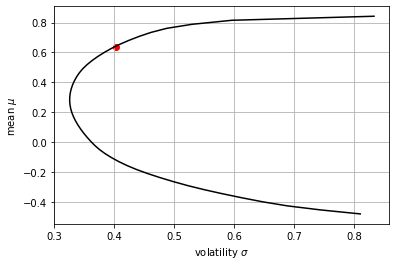

,나노메딕스,필룩스,카리스국보,동성제약,에이프로젠 KIC,엔케이물산,웰바이오텍,일신석재,인디에프,넥스트사이언스,인스코비,대호에이엘,동양철관,동양네트웍스,파미셀,일성건설,비티원,한창
비중,0.06987,0.114071,0.127491,0.198123,4.336809e-19,0.042526,0.010523,0.0,0.0,0.060845,0.051431,0.25057,9.740879e-21,0.000694,7.453890e-20,7.496242e-20,0.008188,0.065667


In [0]:
display_Efficient_frontier(R,C)
scatter(stat[1], stat[0], marker='o', color='red'), grid(True)
xlabel('volatility $\sigma$'), ylabel('mean $\mu$'), show()
display(pd.DataFrame({'비중': opts['x']}, index=종목명).T)

In [0]:
# 우리나라 시간 = 그리니치 표준시 + 9시
current_dt = (dt.datetime.now() + timedelta(hours=9)).strftime('%Y%m%d')
date_col = [current_dt for i in range(noa)] # 날짜 칼럼 생성
print('\n >> 날짜 열 :', date_col)


 >> 날짜 열 : ['20191116', '20191116', '20191116', '20191116', '20191116', '20191116', '20191116', '20191116', '20191116', '20191116', '20191116', '20191116', '20191116', '20191116', '20191116', '20191116', '20191116', '20191116']


In [0]:
mp = {'날짜':date_col,
      '종목명':종목명,
      '종목코드':종목코드,
      '비중':list(optsx),
      '현재가':현재가,
      '한계리스크':MRC,
      '절대리스크':ARC,
      '상대리스크비중':PRC,
      'MVO':(front*100).round(3)}
df1 = pd.DataFrame(mp,columns = ['날짜','종목명','종목코드','비중','현재가','한계리스크','절대리스크','상대리스크비중','MVO'])
print('\n')
print(df1)
df1.to_csv('RB_model_portfolio.csv', index=None)



          날짜        종목명    종목코드      비중  ...   한계리스크   절대리스크  상대리스크비중     MVO
0   20191116      나노메딕스  074610   6.987  ...  38.666   2.702    6.723   6.747
1   20191116        필룩스  033180  11.407  ...  42.980   4.903   12.202  12.212
2   20191116      카리스국보  001140  12.749  ...  40.753   5.196   12.930  12.957
3   20191116       동성제약  002210  19.812  ...  46.495   9.212   22.925  22.931
4   20191116  에이프로젠 KIC  007460   0.000  ...  16.480   0.000    0.000   0.000
5   20191116      엔케이물산  009810   4.253  ...  18.222   0.775    1.929   1.933
6   20191116      웰바이오텍  010600   1.052  ...   4.425   0.047    0.116   0.000
7   20191116       일신석재  007110   0.000  ...  38.323   0.000    0.000   0.000
8   20191116       인디에프  014990   0.000  ...  35.700   0.000    0.000   0.000
9   20191116    넥스트사이언스  003580   6.084  ...  28.726   1.748    4.350   4.369
10  20191116       인스코비  006490   5.143  ...  24.932   1.282    3.191   3.205
11  20191116      대호에이엘  069460  25.057  ...  48.224  12.084  